## time_series_analysis
time series analysis is an important skill for a data analyst. Especially if you work in industries where data changes over time (e.g., finance, economics, operations, sales, or marketing).

## dataset overview
this dataset features 10,000 records of used car sales from 2015 to 2024, capturing various aspects of the sales process. It includes details such as car make, model, distributor, location, and pricing. The dataset is designed to aid in analyzing trends in used car sales, including price fluctuations, sales patterns, and agent performance. Each record is enriched with attributes like mileage, engine power, and sale status, providing a comprehensive view of the used car market over the decade. This dataset is ideal for data analysis projects, offering insights into the automotive sales industry. Feel free to explore the data and uncover patterns that could inform decision-making in car sales and marketing.

## potential time series variables in dataset
Purchased Date <br>
Sold Date <br>
Manufactured Year <br>
Price <br>
Sold Price <br>
Margin-%  <br>
Sales Commission-$  <br>
Feedback (quantified)  <br>
Month/Year  <br>

## types of time series analysis performed on the dataset <br>
### trend analysis <br>
* identify whether car sales are increasing or decreasing over the years.<br>
* examine pricing trends to understand how used car market values are changing.<br>
### seasonality analysis <br>
* look for recurring patterns (e.g., higher sales during specific months or quarters). <br>
  * advanced analysis like comparing monthly trends across years <br>
* analyze seasonal demand for certain car types (SUVs in winter, convertibles in summer). <br>
  * advanced analysis by price and year <br>
### forecasting <br>
* forecast future sales, pricing, or margin trends using historical data. <br>
  * forecast sales using ARIMA <br>
* predict peak sales periods or distributor inventory needs. <br>
  * advanced approaches like prophet:use prophet for seasonality-aware forecasting <br>
### correlation and causation <br>
* examine relationships between variables over time (e.g., Does higher sales commission correlate with more sold cars?). <br>
  * advanced analysis regression <br>
### customer behavior analysis <br>
* study feedback trends over time to evaluate improvements in customer satisfaction. <br>
  * advanced analysis like compare before and after initiatives <br>
  * sentiment analysis for text feedback <br>
* examine whether sales ratings correlate with higher margins or quicker sales.<br>

In [291]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("/Users/sandeepsrinivasdwaram/Documents/create_dataset/used_car_sales.csv")

## Trend Analysis

## 1. Identify whether car sales are increasing or decreasing over the years?

In [292]:
df['Sold Date'] = pd.to_datetime(df['Sold Date'], errors='coerce')

In [293]:
df['Sold Date'] = df['Sold Date'].replace(pd.Timestamp('1970-01-01'), pd.NaT)

In [294]:
dfsolddate = df.dropna(subset=['Sold Date'])

In [295]:
dfsolddate['Year Sold'] = df['Sold Date'].dt.year

In [296]:
dfsolddate['Year Sold'] = dfsolddate['Sold Date'].dt.year.astype('Int64')

In [297]:
sales_by_year = dfsolddate.groupby('Year Sold').size()

In [298]:
sales_by_year

Year Sold
2015     19
2016     49
2017     85
2018     95
2019    163
2020    162
2021    205
2022    319
2023    416
2024    641
2025     12
dtype: int64

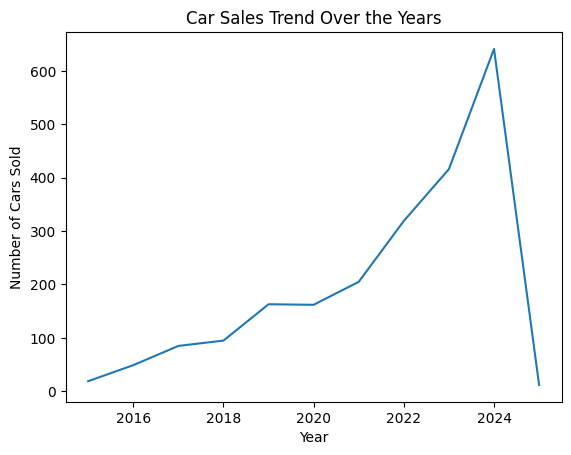

In [299]:
plt.plot(sales_by_year.index, sales_by_year.values)
plt.title('Car Sales Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Cars Sold')
plt.show()

sales_by_year_pct_change = sales_by_year.pct_change() * 100

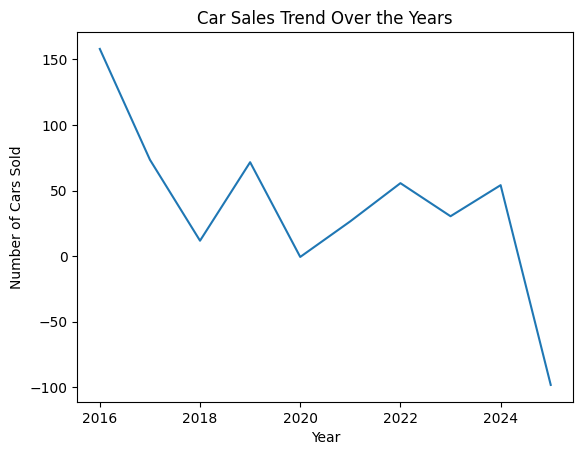

In [300]:
sales_by_year_pct_change

plt.plot(sales_by_year_pct_change.index, sales_by_year_pct_change.values)
plt.title('Car Sales Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Cars Sold')
plt.show()

## 2. Identify whether car purchase by distributors are increasing or decreasing over the years?

In [301]:
df['Purchased Date'] = pd.to_datetime(df['Purchased Date'], errors='coerce')

In [302]:
dfpurchaseddate = df.dropna(subset=['Purchased Date'])

In [303]:
dfpurchaseddate['Purchased Year'] = df['Purchased Date'].dt.year

In [304]:
purchase_by_year = dfpurchaseddate.groupby('Purchased Year').size()

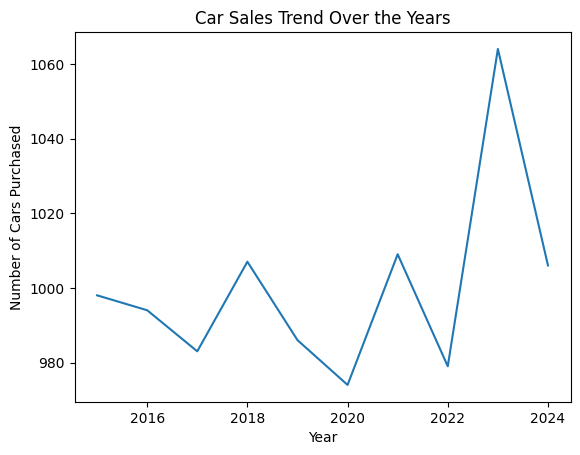

In [305]:
purchase_by_year

plt.plot(purchase_by_year.index, purchase_by_year.values)
plt.title('Car Sales Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Cars Purchased')
plt.show()

In [306]:
purchase_by_year_pct_change = purchase_by_year.pct_change() * 100

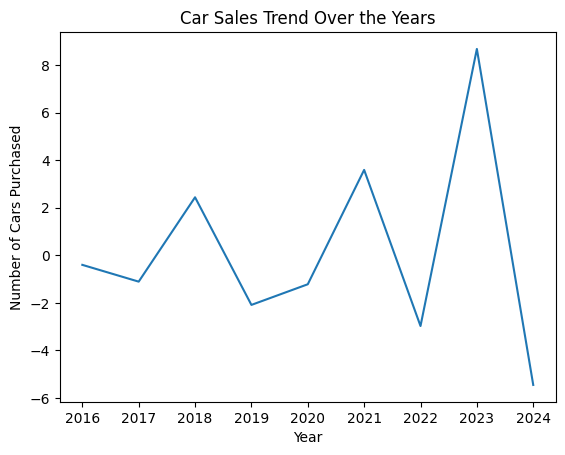

In [307]:
purchase_by_year_pct_change

plt.plot(purchase_by_year_pct_change.index, purchase_by_year_pct_change.values)
plt.title('Car Sales Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Cars Purchased')
plt.show()

## 3. Examine pricing trends to understand how used car market values are changing.

In [308]:
dfsolddate['Month-Year Sold'] = dfsolddate['Sold Date'].dt.to_period('M')

In [309]:
pricing_trends1 = dfsolddate.groupby('Year Sold')['Price-$'].agg(['mean', 'median', 'min', 'max'])

In [310]:
pricing_trends1

,mean,median,min,max
Year Sold,,,,
2015,7442.105263,7400.0,6100,9900
2016,7810.204082,7600.0,6300,10700
2017,7915.294118,7800.0,6100,10400
2018,7925.263158,7700.0,6200,10400
2019,8037.423313,7900.0,6000,10700
2020,7945.061728,7800.0,6000,10500
2021,7905.365854,7900.0,6000,10900
2022,8096.551724,8000.0,6000,10900
2023,7970.192308,7900.0,6000,10800


In [311]:
pricing_trends2 = dfsolddate.groupby('Year Sold')['Purchased Price-$'].agg(['mean', 'median', 'min', 'max'])

In [312]:
pricing_trends3 = dfsolddate.groupby('Year Sold')['Sold Price-$'].agg(['mean', 'median', 'min', 'max'])

In [313]:
pricing_trends2

,mean,median,min,max
Year Sold,,,,
2015,5971.526316,5950.0,4324,8534
2016,6606.918367,6548.0,4308,9021
2017,6755.223529,6617.0,4341,9371
2018,6704.610526,6521.0,4718,9500
2019,6820.779141,6684.0,4594,9975
2020,6802.049383,6714.5,4231,9880
2021,6635.048780,6620.0,4125,10332
2022,6851.291536,6780.0,4357,10148
2023,6717.548077,6748.5,4400,10024


In [314]:
pricing_trends3

,mean,median,min,max
Year Sold,,,,
2015,6084.105263,6104.0,3293,9028
2016,6846.918367,6516.0,4438,10399
2017,6900.741176,6659.0,3951,9452
2018,6818.315789,6691.0,3718,10214
2019,6806.429448,6571.0,3822,10315
2020,6833.833333,6778.5,3903,10727
2021,6739.653659,6768.0,3091,11657
2022,7023.554859,6994.0,3223,11382
2023,6913.639423,6982.5,3381,11075


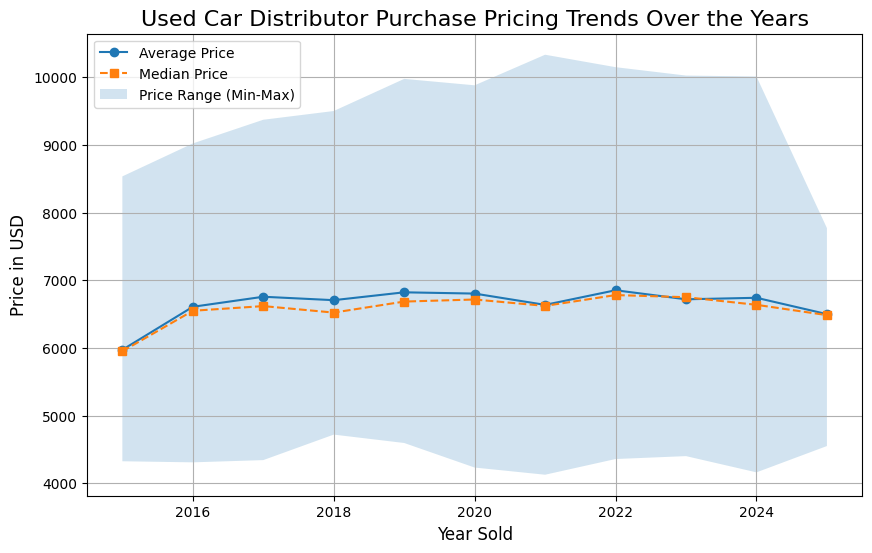

In [315]:
plt.figure(figsize=(10, 6))
plt.plot(pricing_trends2.index, pricing_trends2['mean'], label='Average Price', marker='o')
plt.plot(pricing_trends2.index, pricing_trends2['median'], label='Median Price', linestyle='--', marker='s')
plt.fill_between(pricing_trends2.index, pricing_trends2['min'], pricing_trends2['max'], alpha=0.2, label='Price Range (Min-Max)')
plt.title('Used Car Distributor Purchase Pricing Trends Over the Years', fontsize=16)
plt.xlabel('Year Sold', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend()
plt.grid()
plt.show()

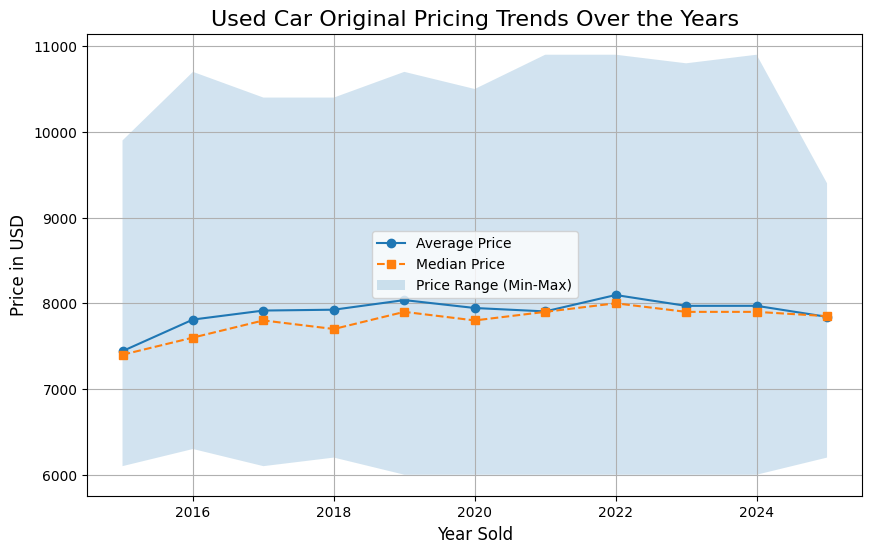

In [316]:
plt.figure(figsize=(10, 6))
plt.plot(pricing_trends1.index, pricing_trends1['mean'], label='Average Price', marker='o')
plt.plot(pricing_trends1.index, pricing_trends1['median'], label='Median Price', linestyle='--', marker='s')
plt.fill_between(pricing_trends1.index, pricing_trends1['min'], pricing_trends1['max'], alpha=0.2, label='Price Range (Min-Max)')
plt.title('Used Car Original Pricing Trends Over the Years', fontsize=16)
plt.xlabel('Year Sold', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend()
plt.grid()
plt.show()

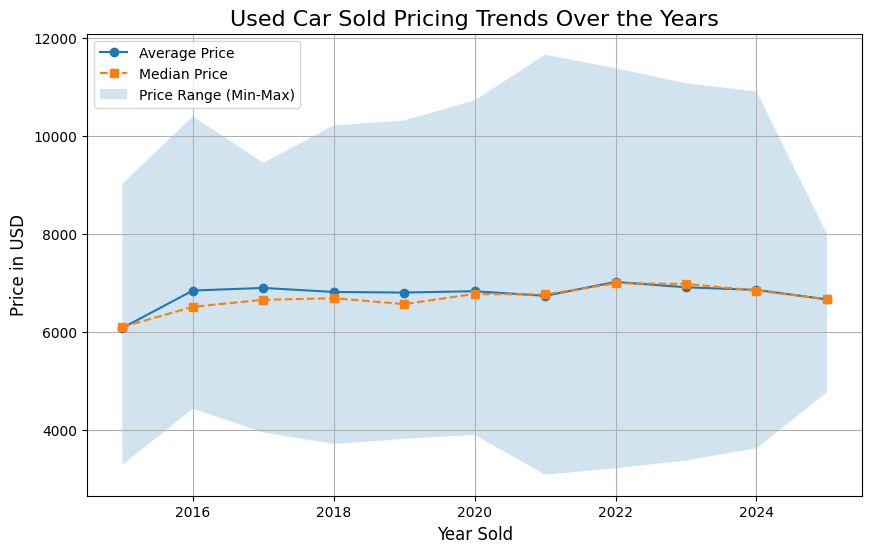

In [317]:
plt.figure(figsize=(10, 6))
plt.plot(pricing_trends3.index, pricing_trends3['mean'], label='Average Price', marker='o')
plt.plot(pricing_trends3.index, pricing_trends3['median'], label='Median Price', linestyle='--', marker='s')
plt.fill_between(pricing_trends3.index, pricing_trends3['min'], pricing_trends3['max'], alpha=0.2, label='Price Range (Min-Max)')
plt.title('Used Car Sold Pricing Trends Over the Years', fontsize=16)
plt.xlabel('Year Sold', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [318]:
monthly_pricing = dfsolddate.groupby('Month-Year Sold')['Purchased Price-$'].mean()

In [319]:
monthly_pricing

Month-Year Sold
2015-03    6522.000000
2015-05    6110.666667
2015-06    5631.000000
2015-07    6078.000000
2015-09    5364.500000
              ...     
2024-10    6456.357143
2024-11    6954.125000
2024-12    6586.183333
2025-01    6369.375000
2025-02    6756.000000
Freq: M, Name: Purchased Price-$, Length: 118, dtype: float64

In [320]:
monthly_pricing.index = monthly_pricing.index.to_timestamp()

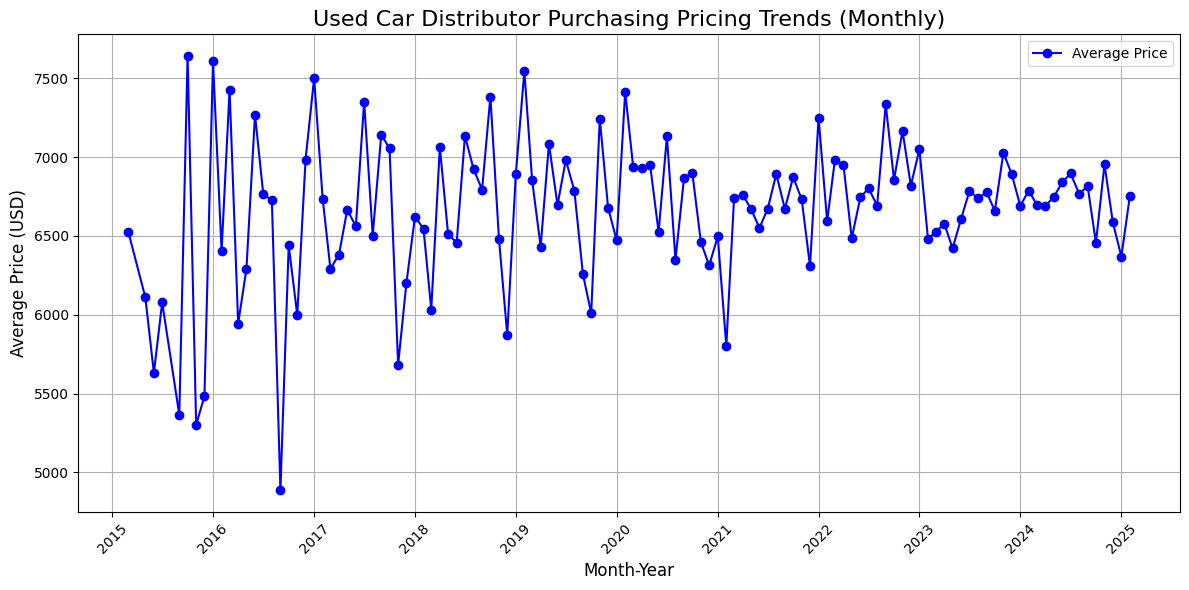

In [321]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_pricing.index, monthly_pricing.values, label='Average Price', marker='o', color='blue')
plt.title('Used Car Distributor Purchasing Pricing Trends (Monthly)', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [322]:
monthly_pricing2 = dfsolddate.groupby('Month-Year Sold')['Sold Price-$'].mean()

In [323]:
monthly_pricing2.index = monthly_pricing2.index.to_timestamp()

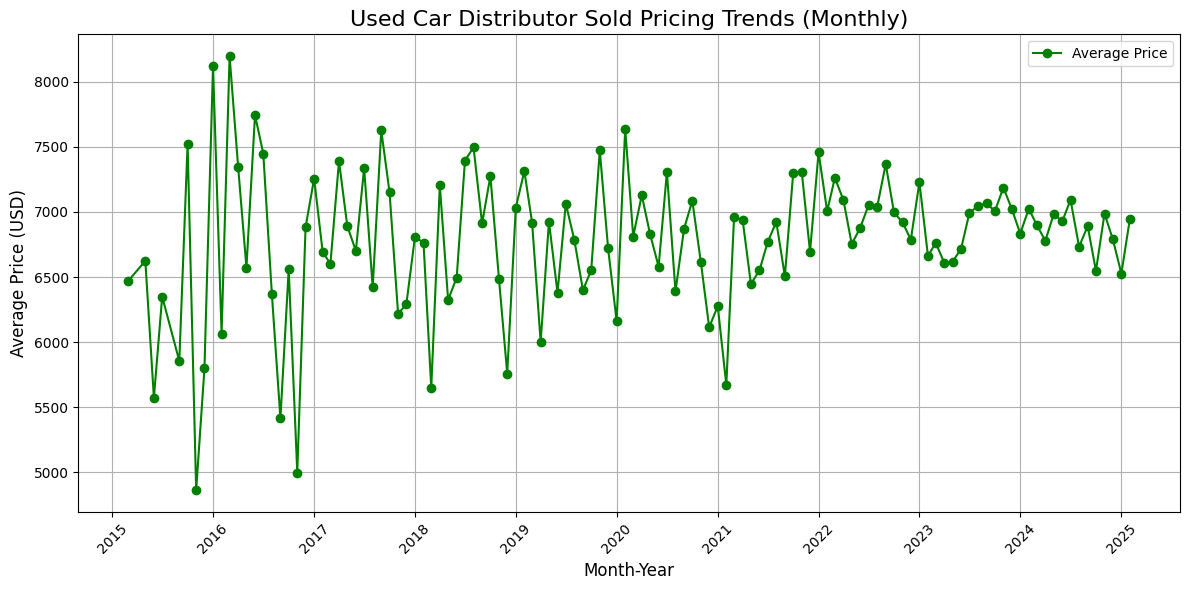

In [324]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_pricing2.index, monthly_pricing2.values, label='Average Price', marker='o', color='Green')
plt.title('Used Car Distributor Sold Pricing Trends (Monthly)', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## (B) Seasonality Analysis

## 1. Look for recurring patterns (e.g., higher sales during specific months or quarters).

In [325]:
dfsolddate['Month Sold'] = df['Sold Date'].dt.month

In [326]:
dfsolddate['Month Sold'] = dfsolddate['Month Sold'].astype('Int64')

In [327]:
monthly_sales = dfsolddate.groupby('Month Sold').size()

In [328]:
monthly_sales

Month Sold
1     144
2     116
3     189
4     175
5     200
6     182
7     205
8     228
9     185
10    173
11    167
12    202
dtype: int64

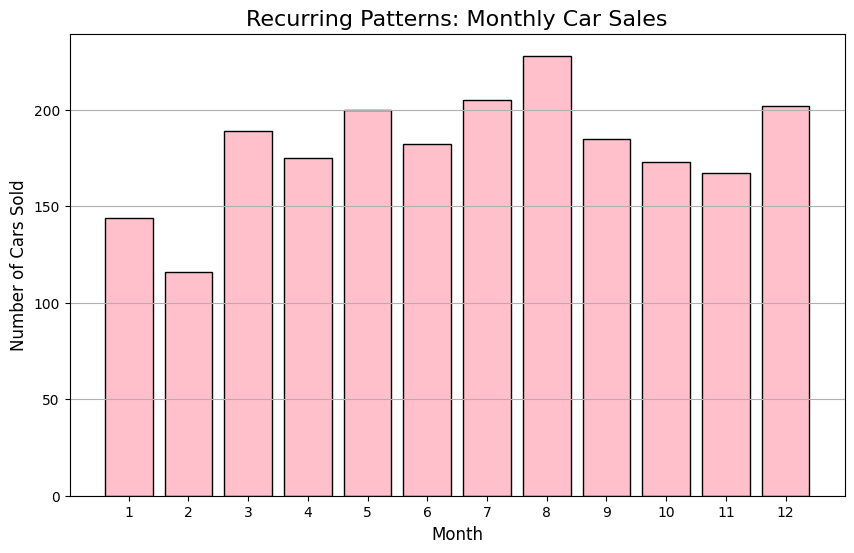

In [329]:
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales.index, monthly_sales.values, color='Pink', edgecolor='black')
plt.title('Recurring Patterns: Monthly Car Sales', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Cars Sold', fontsize=12)
plt.xticks(range(1, 13))  # Ensure all months (1 to 12) are labeled
plt.grid(axis='y')
plt.show()

In [330]:
dfsolddate['Quarter Sold'] = df['Sold Date'].dt.quarter

In [331]:
dfsolddate['Quarter Sold'] = dfsolddate['Quarter Sold'].astype('Int64')

In [332]:
quarterly_sales = dfsolddate.groupby('Quarter Sold').size()

In [333]:
quarterly_sales

Quarter Sold
1    449
2    557
3    618
4    542
dtype: int64

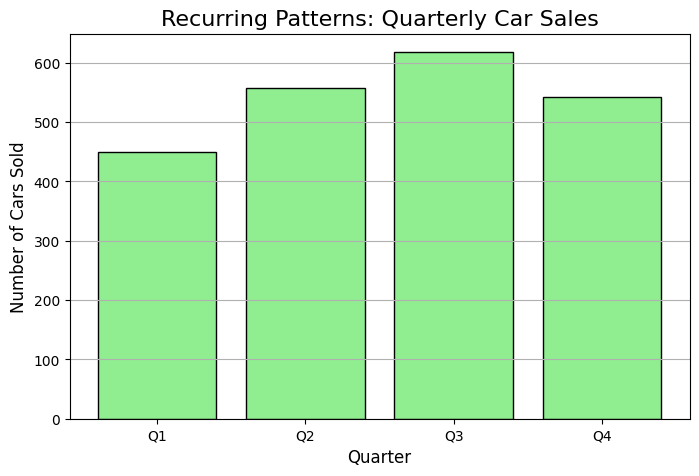

In [334]:
plt.figure(figsize=(8, 5))
plt.bar(quarterly_sales.index, quarterly_sales.values, color='lightgreen', edgecolor='black')
plt.title('Recurring Patterns: Quarterly Car Sales', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Number of Cars Sold', fontsize=12)
plt.xticks(range(1, 5), labels=['Q1', 'Q2', 'Q3', 'Q4'])  # Label quarters
plt.grid(axis='y')
plt.show()

In [335]:
dfsolddate['Year'] = dfsolddate['Month-Year Sold'].dt.year
dfsolddate['Month'] = dfsolddate['Month-Year Sold'].dt.month

In [336]:
year_month_sales = dfsolddate.groupby(['Year', 'Month']).size()

In [337]:
monthly_comparison = year_month_sales.unstack(level=0)

In [338]:
monthly_comparison

Year,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
Month,,,,,,,,,,,
1,NaN,3.0,8.0,3.0,10.0,12.0,14.0,17.0,25.0,44.0,8.0
2,NaN,6.0,3.0,5.0,14.0,8.0,11.0,12.0,24.0,29.0,4.0
3,1.0,3.0,4.0,4.0,15.0,13.0,29.0,29.0,40.0,51.0,NaN
4,NaN,3.0,3.0,10.0,14.0,19.0,15.0,15.0,34.0,62.0,NaN
5,3.0,7.0,11.0,5.0,11.0,14.0,18.0,33.0,40.0,58.0,NaN
6,3.0,2.0,13.0,10.0,14.0,11.0,15.0,31.0,28.0,55.0,NaN
7,4.0,6.0,8.0,8.0,19.0,19.0,16.0,43.0,36.0,46.0,NaN
8,NaN,4.0,10.0,13.0,16.0,12.0,22.0,42.0,41.0,68.0,NaN
9,2.0,2.0,7.0,16.0,15.0,14.0,18.0,19.0,36.0,56.0,NaN


In [339]:
monthly_comparison = monthly_comparison.fillna(0)

In [340]:
monthly_comparison 

Year,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
Month,,,,,,,,,,,
1,0.0,3.0,8.0,3.0,10.0,12.0,14.0,17.0,25.0,44.0,8.0
2,0.0,6.0,3.0,5.0,14.0,8.0,11.0,12.0,24.0,29.0,4.0
3,1.0,3.0,4.0,4.0,15.0,13.0,29.0,29.0,40.0,51.0,0.0
4,0.0,3.0,3.0,10.0,14.0,19.0,15.0,15.0,34.0,62.0,0.0
5,3.0,7.0,11.0,5.0,11.0,14.0,18.0,33.0,40.0,58.0,0.0
6,3.0,2.0,13.0,10.0,14.0,11.0,15.0,31.0,28.0,55.0,0.0
7,4.0,6.0,8.0,8.0,19.0,19.0,16.0,43.0,36.0,46.0,0.0
8,0.0,4.0,10.0,13.0,16.0,12.0,22.0,42.0,41.0,68.0,0.0
9,2.0,2.0,7.0,16.0,15.0,14.0,18.0,19.0,36.0,56.0,0.0


In [341]:
monthly_comparison = monthly_comparison.astype(int)

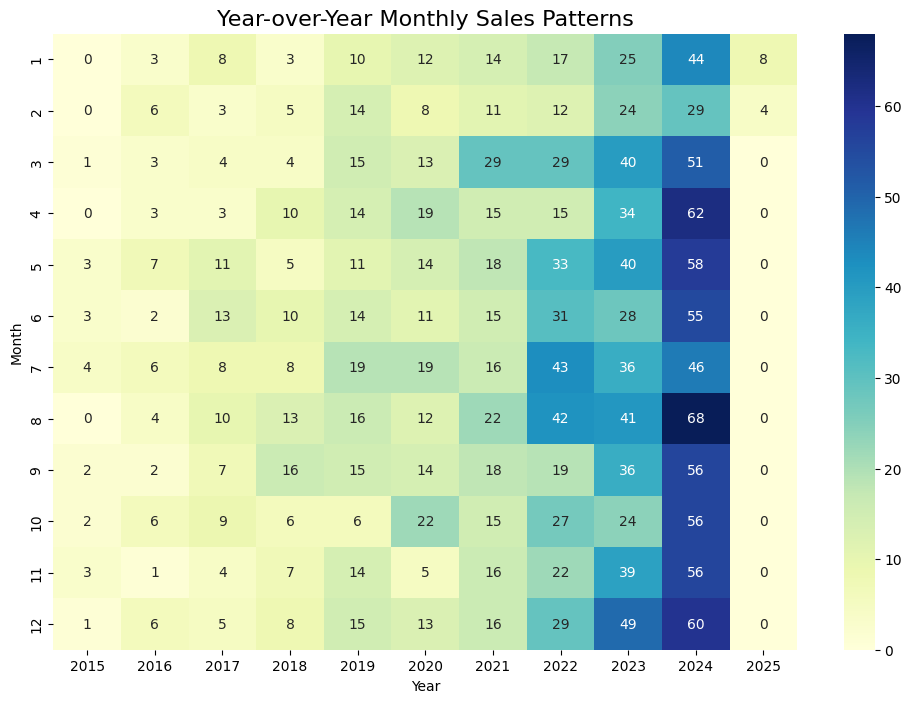

In [342]:
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_comparison, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Year-over-Year Monthly Sales Patterns', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

## 2. Analyze Seasonal Demand for Specific Car Types.

In [343]:
def get_season(month):
    if month in [12, 1, 2]:  # Winter
        return 'Winter'
    elif month in [3, 4, 5]:  # Spring
        return 'Spring'
    elif month in [6, 7, 8]:  # Summer
        return 'Summer'
    else:  # Fall
        return 'Fall'
dfsolddate['Season'] = dfsolddate['Sold Date'].dt.month.apply(get_season)

In [344]:
dfsolddate['Car Type'].value_counts()

Car Type
Hatchback      679
SUV            661
Truck          361
Sedan          303
Convertible    162
Name: count, dtype: int64

In [345]:
filtered_data = dfsolddate[dfsolddate['Car Type'].isin(['SUV', 'Convertible','Hatchback', 'Truck', 'Sedan'])]

In [346]:
filtered_data

,ID,Distributor Name,Location,Car Name,Manufacturer Name,Car Type,Color,Gearbox,Number of Seats,Number of Doors,...,Sales Rating,Sales Commission-$,Feedback,Year Sold,Month-Year Sold,Month Sold,Quarter Sold,Year,Month,Season
1,EPMPC8,Carousell,Philadelphia,Creta,Hyundai,Hatchback,Blue,Automatic,5,5,...,5,0,Good,2021,2021-03,3,1,2021,3,Spring
3,PWP2QK,Trivett,North Carolina,Plato,Prazo,Convertible,Gray,Automatic,2,2,...,1,205,Average,2024,2024-04,4,2,2024,4,Spring
5,I5D584,Zupps,Denver,Fortuner,Toyota,SUV,Red,Automatic,8,5,...,5,279,Excellent,2024,2024-11,11,4,2024,11,Fall
14,IKYB6R,Nufor,Tucson,Scorpio,Mahindra,SUV,Red,Automatic,5,5,...,2,68,Excellent,2022,2022-10,10,4,2022,10,Fall
17,U7L0OA,Carmix,Philadelphia,Creta,Hyundai,Hatchback,Red,Automatic,5,5,...,1,0,Good,2024,2024-05,5,2,2024,5,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9961,1LMJ4Z,Cars24,Oklahoma,Swift,Maruti,Sedan,Red,Manual,5,4,...,3,0,Excellent,2024,2024-05,5,2,2024,5,Spring
9981,CFT40G,Skipper,Philadelphia,Etriga,Maruti,Hatchback,Black,Automatic,4,5,...,1,30,Excellent,2021,2021-04,4,2,2021,4,Spring
9983,G0K5HM,Motor,Tennessee,Seltos,Kia,Hatchback,Red,Automatic,5,5,...,5,122,Excellent,2023,2023-05,5,2,2023,5,Spring
9993,FCFG98,Carmudi,Florida,Scorpio,Mahindra,SUV,Black,Automatic,5,5,...,3,0,Good,2016,2016-02,2,1,2016,2,Winter


In [347]:
seasonal_demand = filtered_data.groupby(['Season', 'Car Type']).size().unstack()

In [348]:
seasonal_demand

Car Type,Convertible,Hatchback,SUV,Sedan,Truck
Season,,,,,
Fall,38,149,160,86,92
Spring,42,185,178,70,89
Summer,50,186,186,84,109
Winter,32,159,137,63,71


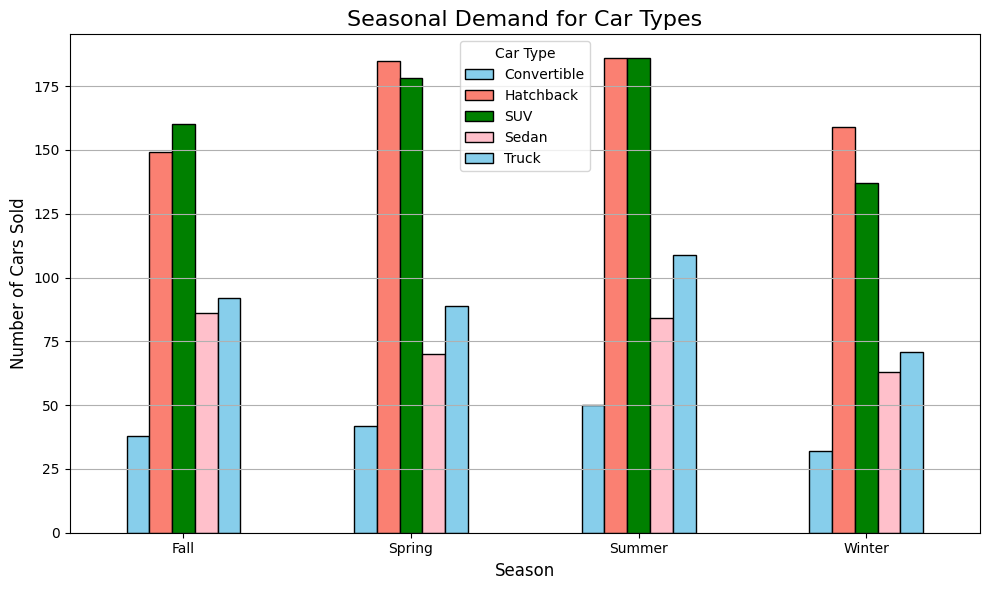

In [349]:
seasonal_demand.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon', 'Green','Pink'], edgecolor='black')
plt.title('Seasonal Demand for Car Types', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Cars Sold', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Car Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [350]:
seasonal_pricing1 = filtered_data.groupby(['Season', 'Car Type'])['Purchased Price-$'].mean().unstack()

In [351]:
seasonal_pricing2 = filtered_data.groupby(['Season', 'Car Type'])['Sold Price-$'].mean().unstack()

<Axes: xlabel='Season'>

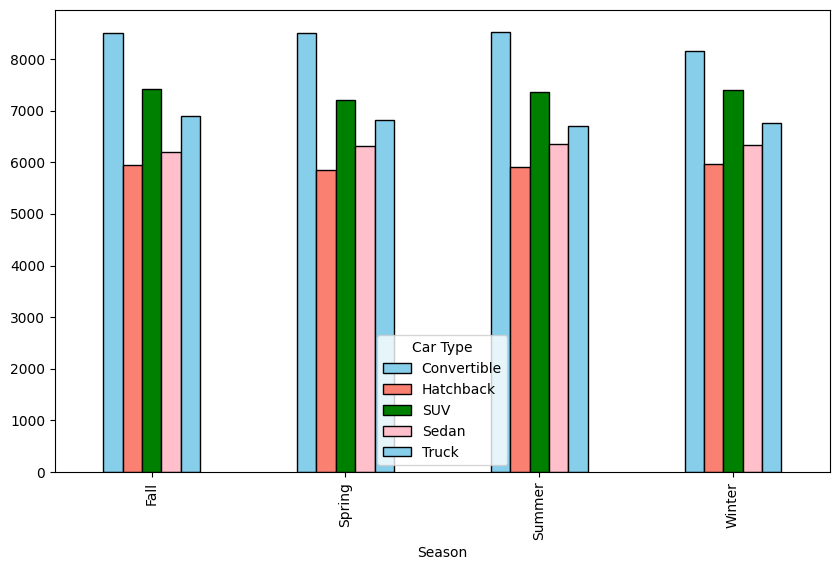

In [352]:
seasonal_pricing1.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon', 'Green','Pink'], edgecolor='black')

<Axes: xlabel='Season'>

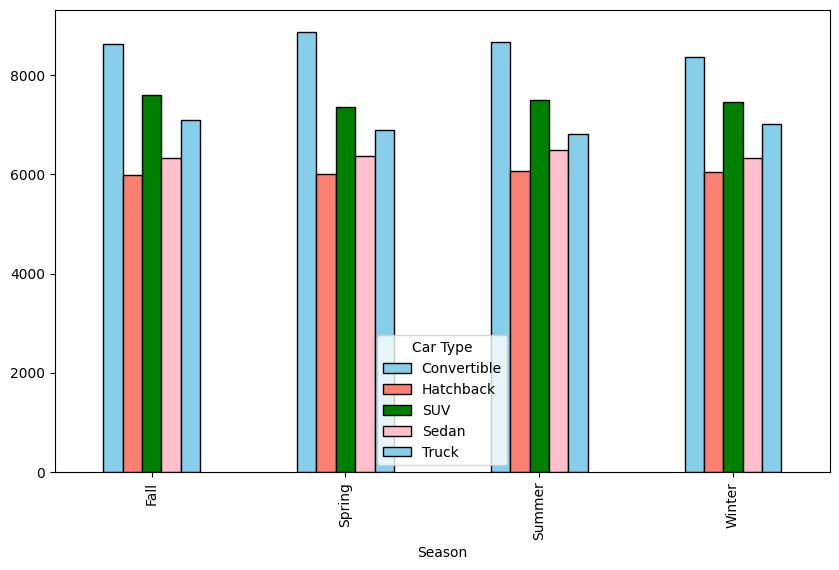

In [353]:
seasonal_pricing2.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon', 'Green','Pink'], edgecolor='black')

In [354]:
filtered_data['Year'] = filtered_data['Sold Date'].dt.year

In [355]:
yearly_seasonal_demand = filtered_data.groupby(['Year', 'Season', 'Car Type']).size().unstack()

In [356]:
yearly_seasonal_demand

Car Type     Convertible  Hatchback   SUV  Sedan  Truck
Year Season                                            
2015 Fall            NaN        5.0   1.0    1.0    NaN
     Spring          NaN        1.0   1.0    1.0    1.0
     Summer          NaN        2.0   1.0    1.0    3.0
     Winter          NaN        1.0   NaN    NaN    NaN
2016 Fall            1.0        3.0   1.0    4.0    NaN
     Spring          1.0        7.0   3.0    NaN    2.0
     Summer          2.0        3.0   2.0    2.0    3.0
     Winter          2.0        8.0   4.0    NaN    1.0
2017 Fall            2.0        7.0   5.0    2.0    4.0
     Spring          2.0        8.0   3.0    1.0    4.0
     Summer          3.0       11.0   8.0    6.0    3.0
     Winter          2.0        5.0   4.0    NaN    5.0
2018 Fall            3.0        7.0   8.0    3.0    8.0
     Spring          2.0        6.0   6.0    3.0    2.0
     Summer          4.0       10.0   7.0    5.0    5.0
     Winter          NaN        5.0   4.0    3.0    4.0
2019 Fall            2.0       13.0   8.0    5.0    7.0
     Spring          3.0       11.0  12.0    8.0    6.0
     Summer          5.0       14.0  15.0    7.0    8.0
     Winter          5.0        9.0   9.0    9.0    7.0
2020 Fall            1.0        9.0  10.0    9.0   12.0
     Spring          1.0       12.0  14.0    7.0   12.0
     Summer          4.0       13.0   9.0    4.0   12.0
     Winter          3.0       11.0  10.0    4.0    5.0
2021 Fall            7.0       16.0  15.0    7.0    4.0
     Spring          4.0       18.0  21.0   11.0    8.0
     Summer          2.0       14.0  21.0    7.0    9.0
     Winter          1.0       17.0  11.0    7.0    5.0
2022 Fall            7.0       14.0  24.0   13.0   10.0
     Spring          9.0       22.0  21.0   12.0   13.0
     Summer         14.0       33.0  34.0   15.0   20.0
     Winter          5.0       21.0  14.0    8.0   10.0
2023 Fall            5.0       22.0  38.0   14.0   20.0
     Spring          5.0       42.0  41.0   10.0   16.0
     Summer          8.0       35.0  31.0   16.0   15.0
     Winter          5.0       33.0  39.0   11.0   10.0
2024 Fall           10.0       53.0  50.0   28.0   27.0
     Spring         15.0       58.0  56.0   17.0   25.0
     Summer          8.0       51.0  58.0   21.0   31.0
     Winter          9.0       46.0  38.0   17.0   23.0
2025 Winter          NaN        3.0   4.0    4.0    1.0

In [357]:
yearly_seasonal_demand = yearly_seasonal_demand.fillna(0)

In [358]:
yearly_seasonal_demand

Car Type     Convertible  Hatchback   SUV  Sedan  Truck
Year Season                                            
2015 Fall            0.0        5.0   1.0    1.0    0.0
     Spring          0.0        1.0   1.0    1.0    1.0
     Summer          0.0        2.0   1.0    1.0    3.0
     Winter          0.0        1.0   0.0    0.0    0.0
2016 Fall            1.0        3.0   1.0    4.0    0.0
     Spring          1.0        7.0   3.0    0.0    2.0
     Summer          2.0        3.0   2.0    2.0    3.0
     Winter          2.0        8.0   4.0    0.0    1.0
2017 Fall            2.0        7.0   5.0    2.0    4.0
     Spring          2.0        8.0   3.0    1.0    4.0
     Summer          3.0       11.0   8.0    6.0    3.0
     Winter          2.0        5.0   4.0    0.0    5.0
2018 Fall            3.0        7.0   8.0    3.0    8.0
     Spring          2.0        6.0   6.0    3.0    2.0
     Summer          4.0       10.0   7.0    5.0    5.0
     Winter          0.0        5.0   4.0    3.0    4.0
2019 Fall            2.0       13.0   8.0    5.0    7.0
     Spring          3.0       11.0  12.0    8.0    6.0
     Summer          5.0       14.0  15.0    7.0    8.0
     Winter          5.0        9.0   9.0    9.0    7.0
2020 Fall            1.0        9.0  10.0    9.0   12.0
     Spring          1.0       12.0  14.0    7.0   12.0
     Summer          4.0       13.0   9.0    4.0   12.0
     Winter          3.0       11.0  10.0    4.0    5.0
2021 Fall            7.0       16.0  15.0    7.0    4.0
     Spring          4.0       18.0  21.0   11.0    8.0
     Summer          2.0       14.0  21.0    7.0    9.0
     Winter          1.0       17.0  11.0    7.0    5.0
2022 Fall            7.0       14.0  24.0   13.0   10.0
     Spring          9.0       22.0  21.0   12.0   13.0
     Summer         14.0       33.0  34.0   15.0   20.0
     Winter          5.0       21.0  14.0    8.0   10.0
2023 Fall            5.0       22.0  38.0   14.0   20.0
     Spring          5.0       42.0  41.0   10.0   16.0
     Summer          8.0       35.0  31.0   16.0   15.0
     Winter          5.0       33.0  39.0   11.0   10.0
2024 Fall           10.0       53.0  50.0   28.0   27.0
     Spring         15.0       58.0  56.0   17.0   25.0
     Summer          8.0       51.0  58.0   21.0   31.0
     Winter          9.0       46.0  38.0   17.0   23.0
2025 Winter          0.0        3.0   4.0    4.0    1.0

In [359]:
yearly_seasonal_demand = yearly_seasonal_demand.astype(int)

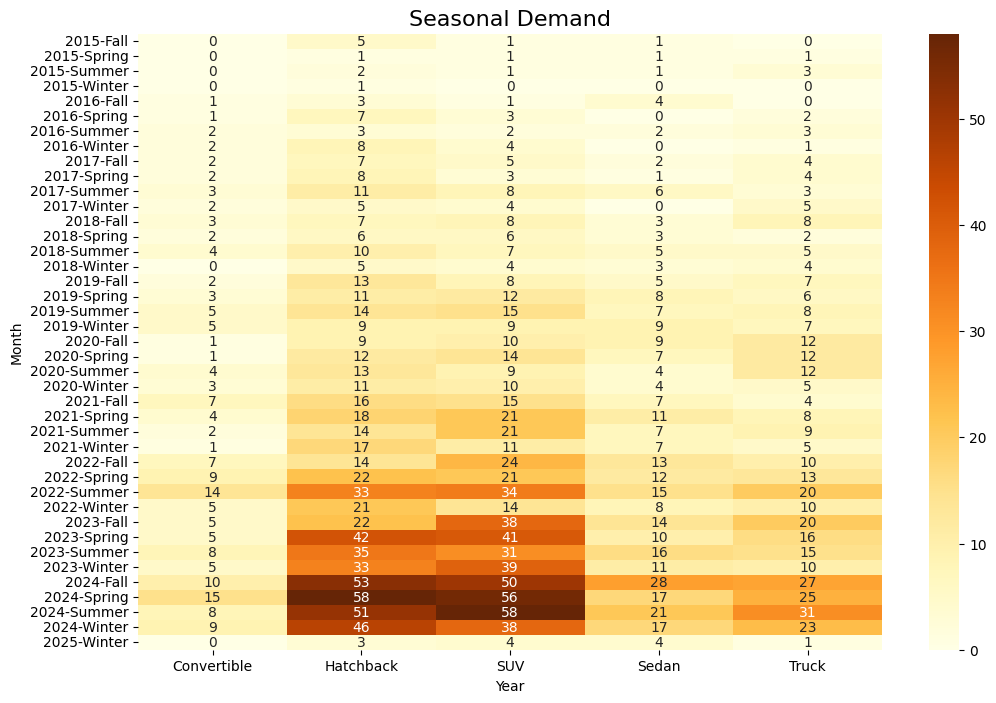

In [360]:
plt.figure(figsize=(12, 8))
sns.heatmap(yearly_seasonal_demand, annot=True, fmt='d', cmap='YlOrBr', cbar=True)
plt.title('Seasonal Demand', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

## (c) Forecasting

## 1. Forecast future sales, pricing, or margin trends. 

In [361]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [363]:
monthly_sales_forecast = dfsolddate.groupby('Month-Year Sold').size()

In [364]:
monthly_sales_forecast

Month-Year Sold
2015-03     1
2015-05     3
2015-06     3
2015-07     4
2015-09     2
           ..
2024-10    56
2024-11    56
2024-12    60
2025-01     8
2025-02     4
Freq: M, Length: 118, dtype: int64

In [365]:
monthly_sales_forecast.index = monthly_sales_forecast.index.to_timestamp()

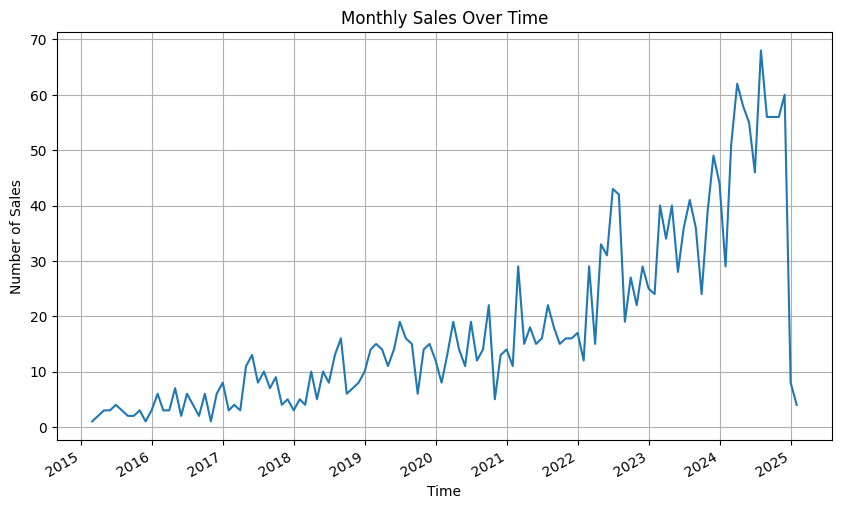

In [366]:
plt.figure(figsize=(10, 6))
monthly_sales_forecast.plot(title="Monthly Sales Over Time", ylabel="Number of Sales", xlabel="Time")
plt.grid()
plt.show()

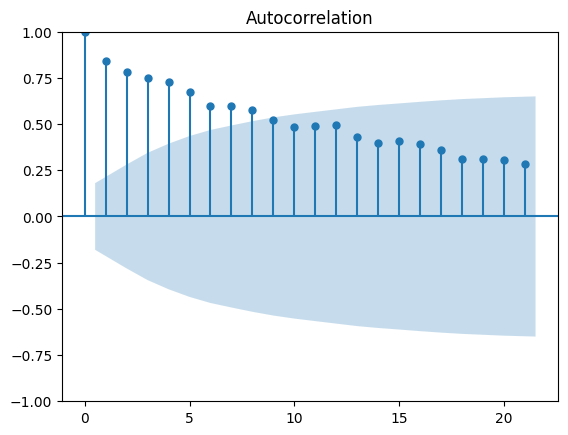

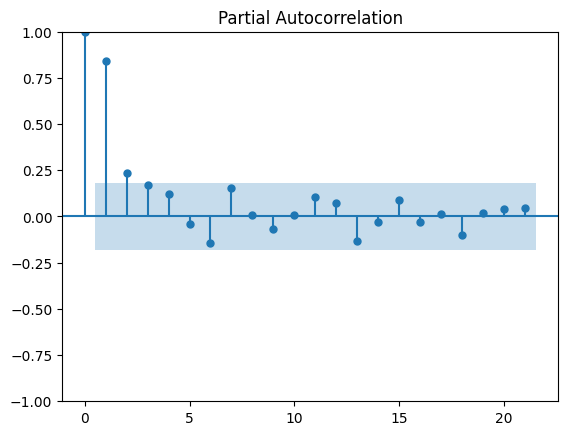

In [367]:
plot_acf(monthly_sales_forecast)
plot_pacf(monthly_sales_forecast)
plt.show()

In [368]:
model = ARIMA(monthly_sales_forecast, order=(1, 1, 1))  
model_fit = model.fit()

In [369]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  118
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -412.551
Date:                Tue, 21 Jan 2025   AIC                            831.101
Time:                        16:57:38   BIC                            839.388
Sample:                             0   HQIC                           834.466
                                - 118                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4041      0.096      4.230      0.000       0.217       0.591
ma.L1         -0.8066      0.085     -9.540      0.000      -0.972      -0.641
sigma2        67.3903      4.494     14.996      0.000      58.582      76.198
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               713.59
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):              18.69   Skew:                            -1.82
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [370]:
forecast = model_fit.get_forecast(steps=36)
forecast_index = pd.date_range(monthly_sales_forecast.index[-1] + pd.DateOffset(1), periods=36, freq='M')
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

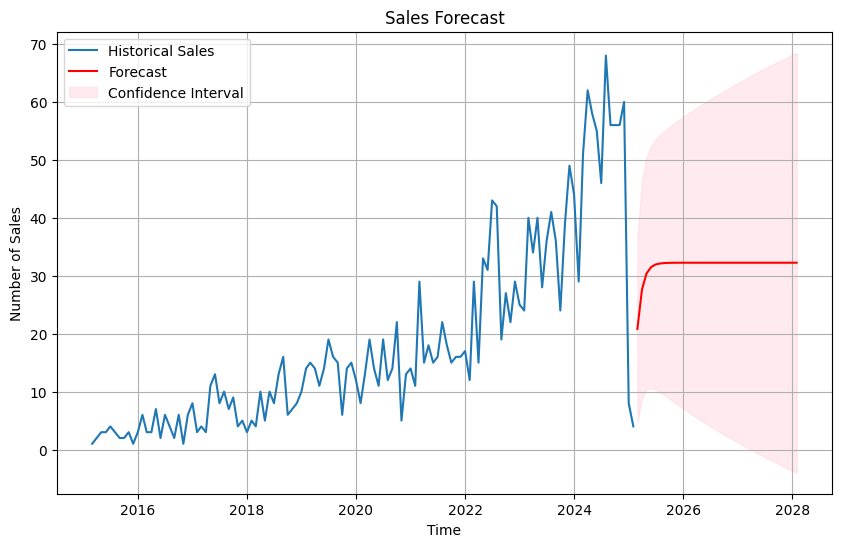

In [371]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_forecast, label='Historical Sales')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title("Sales Forecast")
plt.xlabel("Time")
plt.ylabel("Number of Sales")
plt.legend()
plt.grid()
plt.show()

## 2. Forecast Peak Sales and Inventory Needs.

In [372]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [373]:
model = ExponentialSmoothing(monthly_sales_forecast, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

In [374]:
forecast = model_fit.forecast(steps=12)

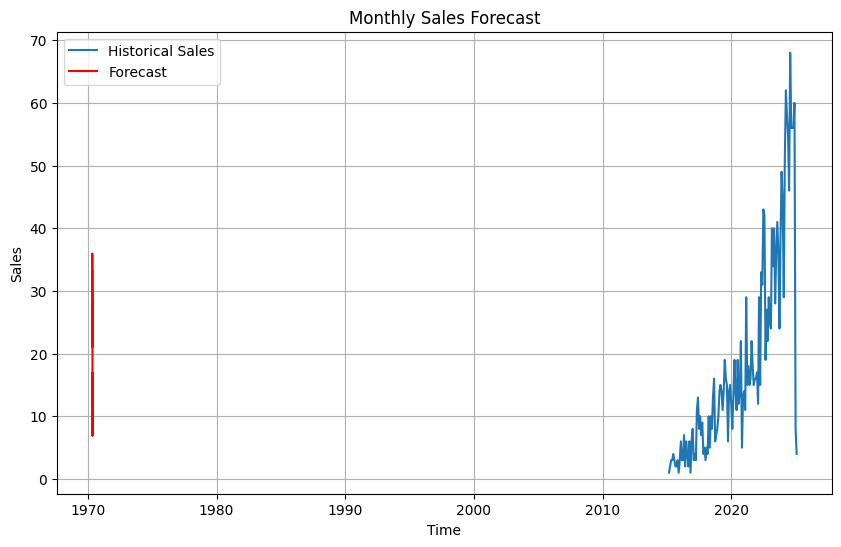

In [375]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_forecast, label='Historical Sales')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Monthly Sales Forecast')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

In [376]:
model_fit.summary()

Dep. Variable:,None,No. Observations:,118
Model:,ExponentialSmoothing,SSE,7008.781
Optimized:,True,AIC,513.940
Trend:,Additive,BIC,558.271
Seasonal:,Additive,AICC,520.849
Seasonal Periods:,12,Date:,"Tue, 21 Jan 2025"
Box-Cox:,False,Time:,16:57:39
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5022289,alpha,True
smoothing_trend,1.1089e-10,beta,True


## 3. Estimate Inventory Needs.

In [377]:
lead_time = 2  
variability_factor = 1.2

In [378]:
inventory_needs = forecast * lead_time * variability_factor

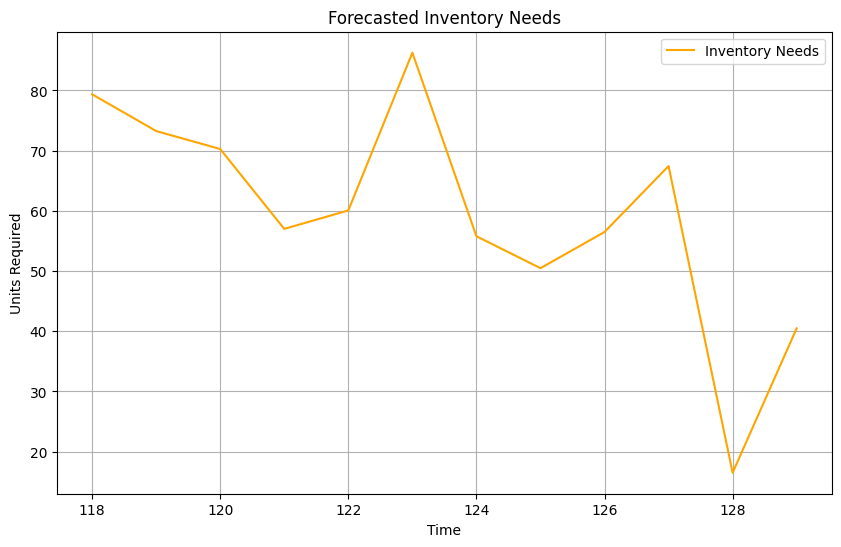

In [379]:
plt.figure(figsize=(10, 6))
plt.plot(inventory_needs, label='Inventory Needs', color='orange')
plt.title('Forecasted Inventory Needs')
plt.xlabel('Time')
plt.ylabel('Units Required')
plt.legend()
plt.grid()
plt.show()

In [380]:
distributor_sales = dfsolddate.groupby(['Distributor Name', 'Month-Year Sold']).size().unstack()


In [381]:
distributor_sales

Month-Year Sold,2015-03,2015-05,2015-06,2015-07,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,...,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01,2025-02
Distributor Name,,,,,,,,,,,,,,,,,,,,,
APE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,5.0,3.0,2.0,4.0,4.0,4.0,NaN,NaN
Ahg,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,4.0,5.0,1.0,NaN,4.0,NaN,NaN,NaN,NaN
Automart,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,2.0,3.0,2.0,7.0,1.0,2.0,3.0,1.0,NaN,NaN
Carmix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,2.0,6.0,1.0,5.0,2.0,2.0,3.0,1.0,1.0,NaN
Carmudi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,5.0,2.0,3.0,3.0,3.0,1.0,1.0,1.0,NaN,NaN
Carousell,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,4.0,1.0,1.0,2.0,5.0,6.0,4.0,4.0,NaN,NaN
Carro,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,3.0,4.0,3.0,1.0,NaN,2.0,1.0,9.0,1.0,1.0
Cars24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,2.0,4.0,3.0,5.0,2.0,1.0,4.0,NaN,NaN
Carsome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,4.0,1.0,1.0,3.0,2.0,3.0,4.0,NaN,NaN


In [382]:
distributor_sales.fillna(0, inplace=True)

In [383]:
distributor_sales

Month-Year Sold,2015-03,2015-05,2015-06,2015-07,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,...,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01,2025-02
Distributor Name,,,,,,,,,,,,,,,,,,,,,
APE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,5.0,3.0,2.0,4.0,4.0,4.0,0.0,0.0
Ahg,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,5.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0
Automart,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,2.0,7.0,1.0,2.0,3.0,1.0,0.0,0.0
Carmix,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,6.0,1.0,5.0,2.0,2.0,3.0,1.0,1.0,0.0
Carmudi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,5.0,2.0,3.0,3.0,3.0,1.0,1.0,1.0,0.0,0.0
Carousell,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,4.0,1.0,1.0,2.0,5.0,6.0,4.0,4.0,0.0,0.0
Carro,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3.0,4.0,3.0,1.0,0.0,2.0,1.0,9.0,1.0,1.0
Cars24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,4.0,3.0,5.0,2.0,1.0,4.0,0.0,0.0
Carsome,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,1.0,1.0,3.0,2.0,3.0,4.0,0.0,0.0


In [384]:
distributor_sales = distributor_sales.astype(int)

In [385]:
distributor_sales

Month-Year Sold,2015-03,2015-05,2015-06,2015-07,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,...,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01,2025-02
Distributor Name,,,,,,,,,,,,,,,,,,,,,
APE,0,0,0,0,0,0,0,0,0,0,...,1,2,5,3,2,4,4,4,0,0
Ahg,0,0,0,1,0,0,0,0,0,0,...,1,4,5,1,0,4,0,0,0,0
Automart,0,0,0,0,1,0,0,0,0,0,...,2,3,2,7,1,2,3,1,0,0
Carmix,0,0,0,0,0,0,0,0,0,1,...,2,6,1,5,2,2,3,1,1,0
Carmudi,0,0,0,0,0,0,0,0,0,3,...,5,2,3,3,3,1,1,1,0,0
Carousell,0,1,0,0,0,0,0,1,0,0,...,4,1,1,2,5,6,4,4,0,0
Carro,0,0,1,0,0,1,1,0,0,0,...,3,4,3,1,0,2,1,9,1,1
Cars24,0,0,0,0,0,0,0,0,0,0,...,4,2,4,3,5,2,1,4,0,0
Carsome,0,0,0,0,0,0,0,0,0,0,...,2,4,1,1,3,2,3,4,0,0


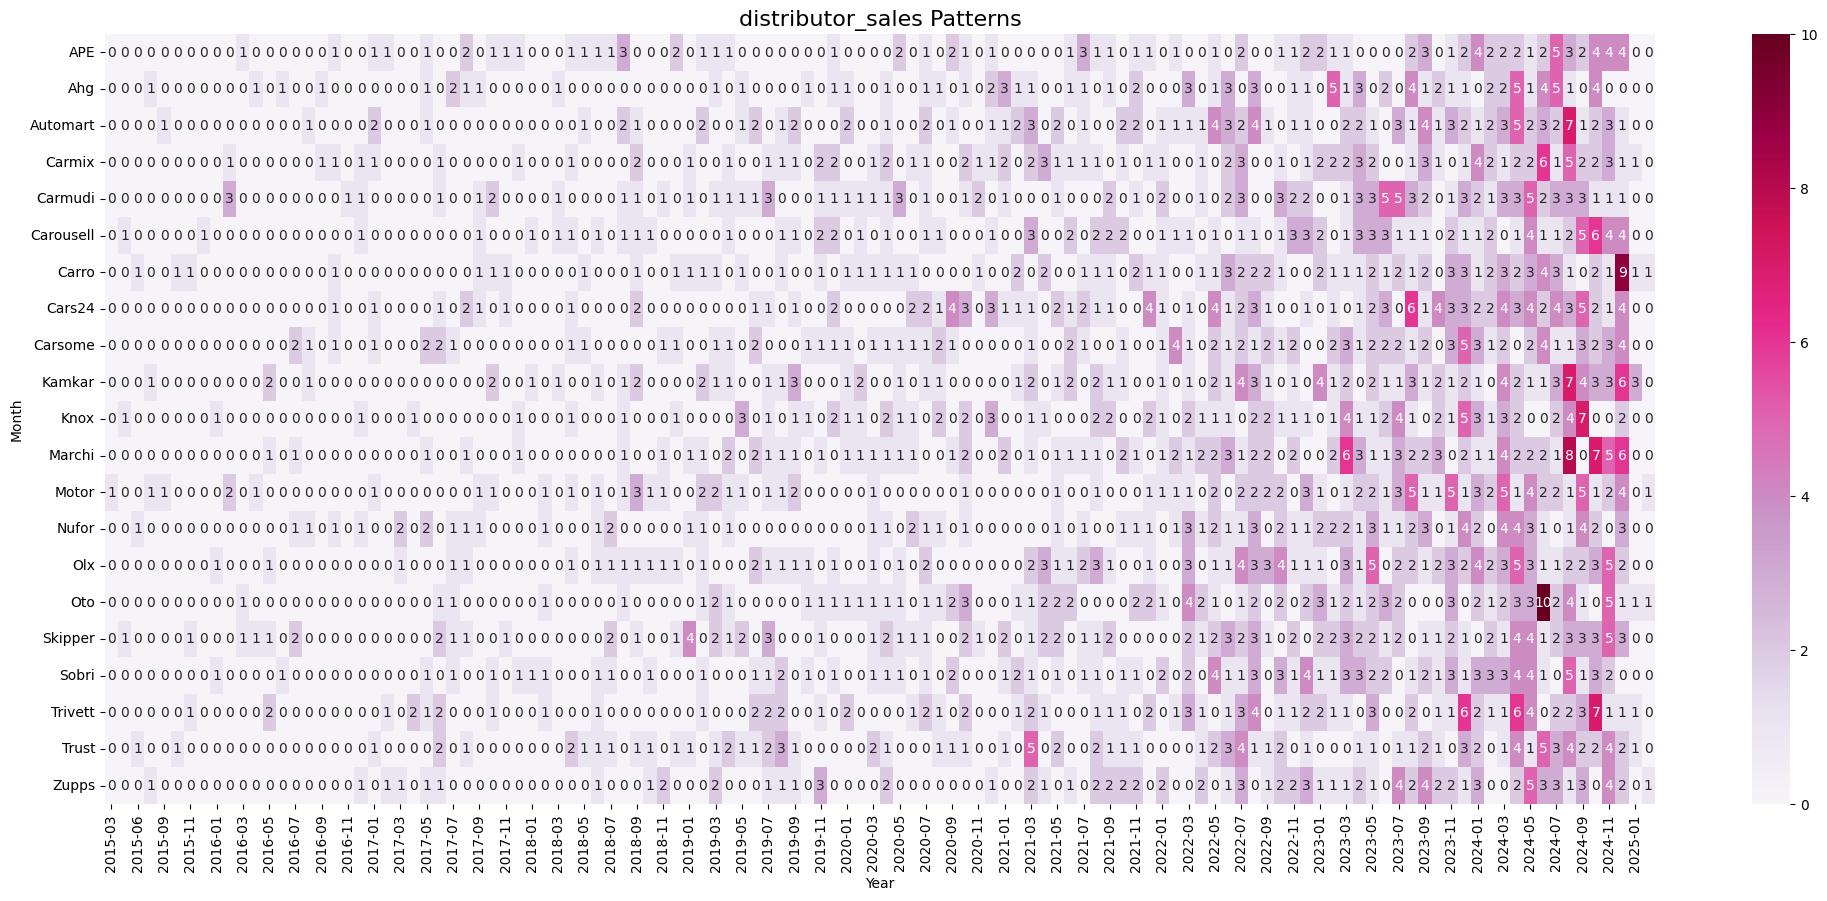

In [386]:
plt.figure(figsize=(25, 10))
sns.heatmap(distributor_sales, annot=True, fmt='d', cmap='PuRd', cbar=True)
plt.title('distributor_sales Patterns', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

In [387]:
from prophet import Prophet

In [388]:
prophet_data = monthly_sales_forecast.reset_index()
prophet_data.columns = ['ds', 'y']

In [389]:
model = Prophet()
model.fit(prophet_data)

16:57:41 - cmdstanpy - INFO - Chain [1] start processing
16:57:41 - cmdstanpy - INFO - Chain [1] done processing


In [390]:
future = model.make_future_dataframe(periods=48, freq='M')
forecast = model.predict(future)

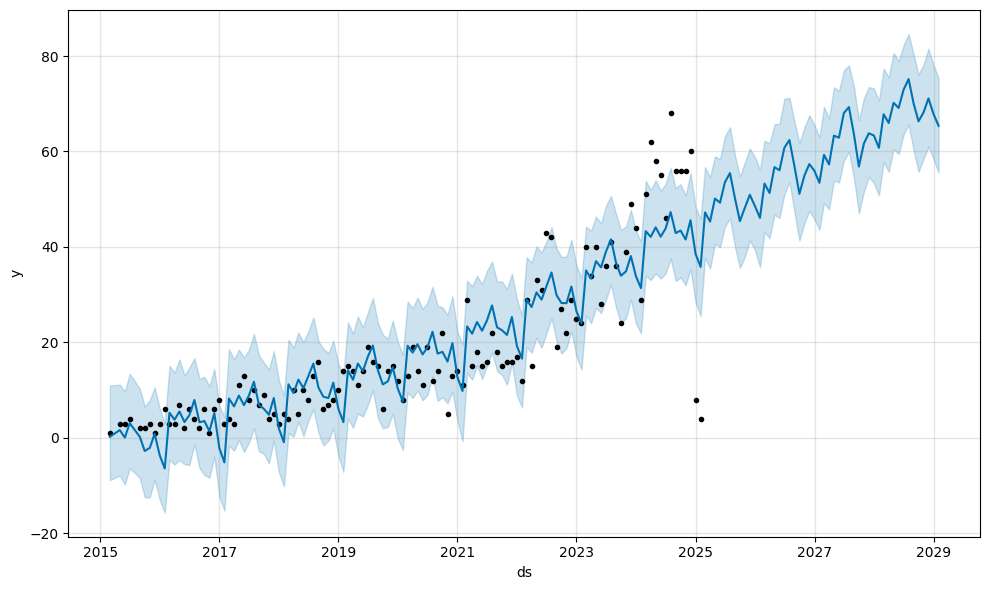

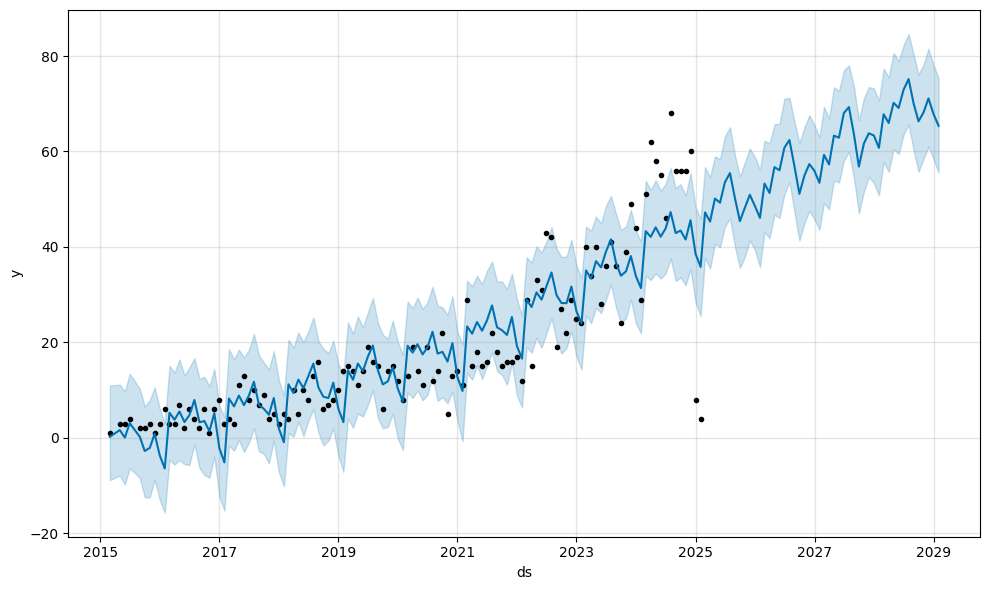

In [391]:
model.plot(forecast)

## (D) Correlation and Causation

## 1. Relationships between variables over time.

In [393]:
df_sold = dfsolddate[dfsolddate['Car Sale Status'] == 'Sold']

In [394]:
df_sold

,ID,Distributor Name,Location,Car Name,Manufacturer Name,Car Type,Color,Gearbox,Number of Seats,Number of Doors,...,Sales Rating,Sales Commission-$,Feedback,Year Sold,Month-Year Sold,Month Sold,Quarter Sold,Year,Month,Season
1,EPMPC8,Carousell,Philadelphia,Creta,Hyundai,Hatchback,Blue,Automatic,5,5,...,5,0,Good,2021,2021-03,3,1,2021,3,Spring
3,PWP2QK,Trivett,North Carolina,Plato,Prazo,Convertible,Gray,Automatic,2,2,...,1,205,Average,2024,2024-04,4,2,2024,4,Spring
5,I5D584,Zupps,Denver,Fortuner,Toyota,SUV,Red,Automatic,8,5,...,5,279,Excellent,2024,2024-11,11,4,2024,11,Fall
14,IKYB6R,Nufor,Tucson,Scorpio,Mahindra,SUV,Red,Automatic,5,5,...,2,68,Excellent,2022,2022-10,10,4,2022,10,Fall
17,U7L0OA,Carmix,Philadelphia,Creta,Hyundai,Hatchback,Red,Automatic,5,5,...,1,0,Good,2024,2024-05,5,2,2024,5,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9961,1LMJ4Z,Cars24,Oklahoma,Swift,Maruti,Sedan,Red,Manual,5,4,...,3,0,Excellent,2024,2024-05,5,2,2024,5,Spring
9981,CFT40G,Skipper,Philadelphia,Etriga,Maruti,Hatchback,Black,Automatic,4,5,...,1,30,Excellent,2021,2021-04,4,2,2021,4,Spring
9983,G0K5HM,Motor,Tennessee,Seltos,Kia,Hatchback,Red,Automatic,5,5,...,5,122,Excellent,2023,2023-05,5,2,2023,5,Spring
9993,FCFG98,Carmudi,Florida,Scorpio,Mahindra,SUV,Black,Automatic,5,5,...,3,0,Good,2016,2016-02,2,1,2016,2,Winter


In [395]:
monthly_data = df_sold.groupby('Month-Year Sold').agg({
    'Sales Commission-$': 'sum',  # Total commissions
    'ID': 'count'                # Count of cars sold
}).rename(columns={'ID': 'Cars Sold'})

In [396]:
monthly_data

,Sales Commission-$,Cars Sold
Month-Year Sold,,
2015-03,0,1
2015-05,525,3
2015-06,195,3
2015-07,358,4
2015-09,197,2
...,...,...
2024-10,4500,56
2024-11,4694,56
2024-12,4945,60


In [397]:
correlation = monthly_data['Sales Commission-$'].corr(monthly_data['Cars Sold'])
print(f"Correlation between Sales Commission and Cars Sold: {correlation}")

Correlation between Sales Commission and Cars Sold: 0.9561817042398703


In [398]:
monthly_data.index = monthly_data.index.to_timestamp()

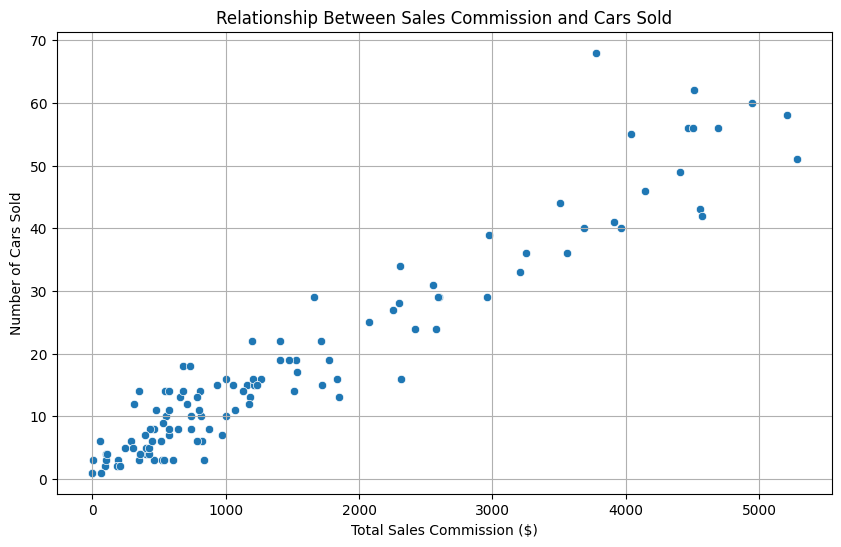

In [399]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales Commission-$', y='Cars Sold', data=monthly_data)
plt.title('Relationship Between Sales Commission and Cars Sold')
plt.xlabel('Total Sales Commission ($)')
plt.ylabel('Number of Cars Sold')
plt.grid()
plt.show()

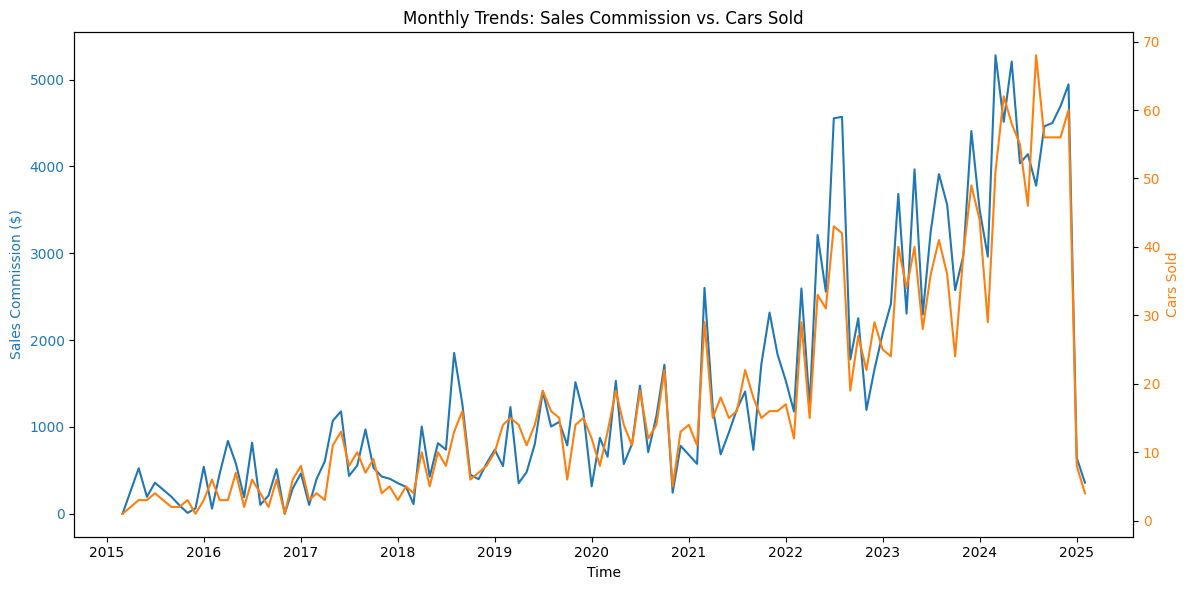

In [400]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_title('Monthly Trends: Sales Commission vs. Cars Sold')
ax1.set_xlabel('Time')
ax1.set_ylabel('Sales Commission ($)', color='tab:blue')
ax1.plot(monthly_data.index, monthly_data['Sales Commission-$'], label='Sales Commission', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Cars Sold', color='tab:orange')
ax2.plot(monthly_data.index, monthly_data['Cars Sold'], label='Cars Sold', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.tight_layout()
plt.show()

In [401]:
import statsmodels.api as sm

In [402]:
X = monthly_data['Sales Commission-$']
y = monthly_data['Cars Sold']

In [403]:
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Cars Sold   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1237.
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           1.01e-63
Time:                        16:57:41   Log-Likelihood:                -350.81
No. Observations:                 118   AIC:                             705.6
Df Residuals:                     116   BIC:                             711.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.8608      0

## (E) Behavior Analysis


## 1. Study feedback trends over time to evaluate improvements in customer satisfaction.

In [404]:
feedback_mapping = {'Excellent': 5, 'Good': 4, 'Average': 3, 'Poor': 2, 'Bad': 1}
dfsolddate['Feedback Score'] = dfsolddate['Feedback'].map(feedback_mapping)

In [405]:
dfsolddate.head(3)

,ID,Distributor Name,Location,Car Name,Manufacturer Name,Car Type,Color,Gearbox,Number of Seats,Number of Doors,...,Sales Commission-$,Feedback,Year Sold,Month-Year Sold,Month Sold,Quarter Sold,Year,Month,Season,Feedback Score
1,EPMPC8,Carousell,Philadelphia,Creta,Hyundai,Hatchback,Blue,Automatic,5,5,...,0,Good,2021,2021-03,3,1,2021,3,Spring,4
3,PWP2QK,Trivett,North Carolina,Plato,Prazo,Convertible,Gray,Automatic,2,2,...,205,Average,2024,2024-04,4,2,2024,4,Spring,3
5,I5D584,Zupps,Denver,Fortuner,Toyota,SUV,Red,Automatic,8,5,...,279,Excellent,2024,2024-11,11,4,2024,11,Fall,5


In [406]:
feedback_trends = dfsolddate.groupby('Month-Year Sold')['Feedback Score'].mean()

In [407]:
feedback_trends

Month-Year Sold
2015-03    3.000000
2015-05    4.000000
2015-06    3.666667
2015-07    2.750000
2015-09    5.000000
             ...   
2024-10    4.232143
2024-11    4.035714
2024-12    4.216667
2025-01    4.000000
2025-02    4.500000
Freq: M, Name: Feedback Score, Length: 118, dtype: float64

In [408]:
feedback_trends.index = feedback_trends.index.to_timestamp()

In [409]:
feedback_trends.head(3)

Month-Year Sold
2015-03-01    3.000000
2015-05-01    4.000000
2015-06-01    3.666667
Name: Feedback Score, dtype: float64

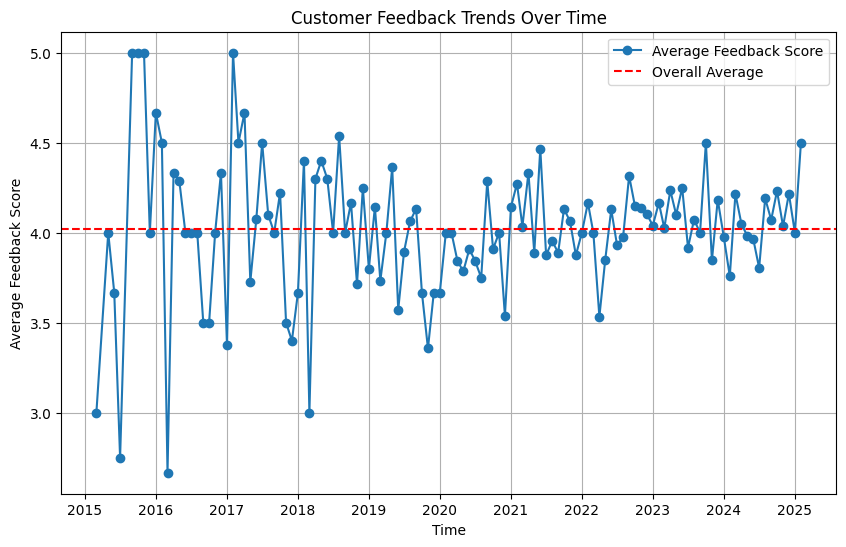

In [410]:
plt.figure(figsize=(10, 6))
plt.plot(feedback_trends, marker='o', label='Average Feedback Score')
plt.title('Customer Feedback Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Average Feedback Score')
plt.axhline(feedback_trends.mean(), color='red', linestyle='--', label='Overall Average')
plt.grid()
plt.legend()
plt.show()

In [411]:
initiative_date = '2022-01'

In [412]:
before_initiative = feedback_trends.loc[:initiative_date]
after_initiative = feedback_trends.loc[initiative_date:]

In [413]:
mean_before = before_initiative.mean()
mean_after = after_initiative.mean()

In [414]:
print(f"Average Feedback Score Before Initiative: {mean_before}")
print(f"Average Feedback Score After Initiative: {mean_after}")

Average Feedback Score Before Initiative: 3.998222479872006
Average Feedback Score After Initiative: 4.0690040427192695


In [415]:
from textblob import TextBlob

In [416]:
dfsolddate['Sentiment Score'] = dfsolddate['Feedback'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [417]:
sentiment_trends = dfsolddate.groupby('Month-Year Sold')['Sentiment Score'].mean()

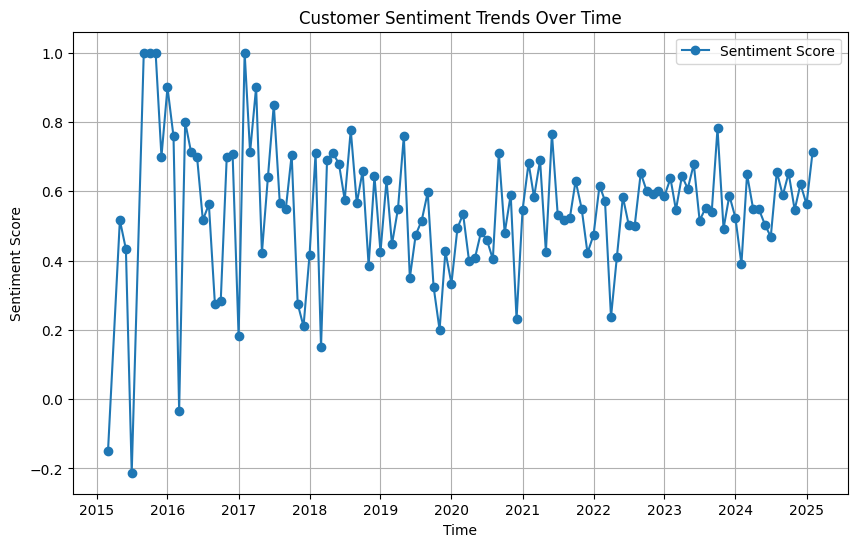

In [418]:
plt.figure(figsize=(10, 6))
plt.plot(sentiment_trends.index.to_timestamp(), sentiment_trends, marker='o', label='Sentiment Score')
plt.title('Customer Sentiment Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Sentiment Score')
plt.grid()
plt.legend()
plt.show()

## 2. Examine whether sales ratings correlate with higher margins or quicker sales.

In [420]:
dfsolddate['Purchased Date'] = pd.to_datetime(dfsolddate['Purchased Date'], errors='coerce')

In [422]:
dfsolddate['Time to Sale'] = (df['Sold Date'] - df['Purchased Date']).dt.days

In [423]:
dfsolddate.head()

,ID,Distributor Name,Location,Car Name,Manufacturer Name,Car Type,Color,Gearbox,Number of Seats,Number of Doors,...,Year Sold,Month-Year Sold,Month Sold,Quarter Sold,Year,Month,Season,Feedback Score,Sentiment Score,Time to Sale
1,EPMPC8,Carousell,Philadelphia,Creta,Hyundai,Hatchback,Blue,Automatic,5,5,...,2021,2021-03,3,1,2021,3,Spring,4,0.70,1286.0
3,PWP2QK,Trivett,North Carolina,Plato,Prazo,Convertible,Gray,Automatic,2,2,...,2024,2024-04,4,2,2024,4,Spring,3,-0.15,324.0
5,I5D584,Zupps,Denver,Fortuner,Toyota,SUV,Red,Automatic,8,5,...,2024,2024-11,11,4,2024,11,Fall,5,1.00,881.0
14,IKYB6R,Nufor,Tucson,Scorpio,Mahindra,SUV,Red,Automatic,5,5,...,2022,2022-10,10,4,2022,10,Fall,5,1.00,-70.0
17,U7L0OA,Carmix,Philadelphia,Creta,Hyundai,Hatchback,Red,Automatic,5,5,...,2024,2024-05,5,2,2024,5,Spring,4,0.70,665.0


In [425]:
dfsolddate['Time to Sale'] = dfsolddate['Time to Sale'].astype('Int64')

In [427]:
dfsolddate = dfsolddate.dropna(subset=['Sales Rating', 'Margin-%', 'Time to Sale'])

In [428]:
correlation_margin = dfsolddate['Sales Rating'].corr(dfsolddate['Margin-%'])
correlation_time_to_sale = dfsolddate['Sales Rating'].corr(dfsolddate['Time to Sale'])

In [429]:
print(f"Correlation between Sales Rating and Margin: {correlation_margin}")
print(f"Correlation between Sales Rating and Time to Sale: {correlation_time_to_sale}")

Correlation between Sales Rating and Margin: 0.022168969387260797
Correlation between Sales Rating and Time to Sale: 0.0006274349154714642


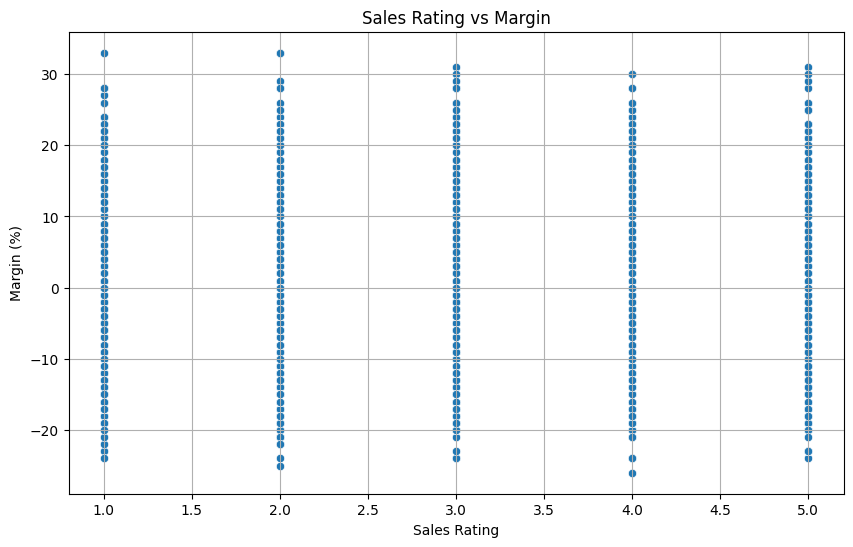

In [430]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales Rating', y='Margin-%', data=df)
plt.title('Sales Rating vs Margin')
plt.xlabel('Sales Rating')
plt.ylabel('Margin (%)')
plt.grid()
plt.show()

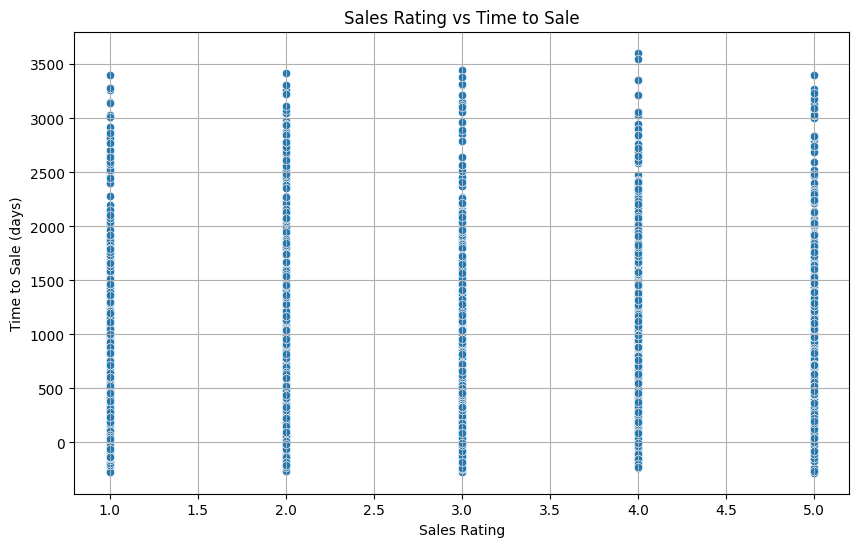

In [431]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales Rating', y='Time to Sale', data=dfsolddate)
plt.title('Sales Rating vs Time to Sale')
plt.xlabel('Sales Rating')
plt.ylabel('Time to Sale (days)')
plt.grid()
plt.show()

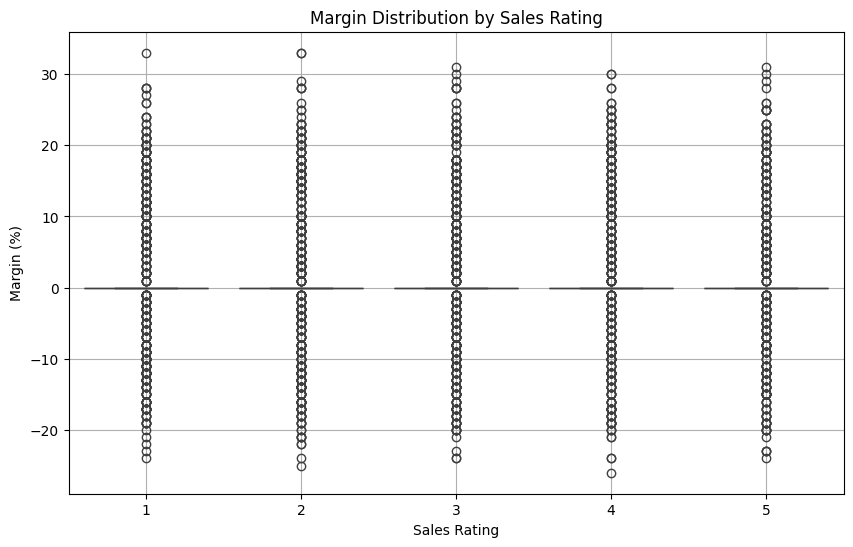

In [432]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sales Rating', y='Margin-%', data=df)
plt.title('Margin Distribution by Sales Rating')
plt.xlabel('Sales Rating')
plt.ylabel('Margin (%)')
plt.grid()
plt.show()

In [433]:
import statsmodels.api as sm

In [434]:
X = sm.add_constant(dfsolddate['Sales Rating'])  
y_margin = dfsolddate['Margin-%']

In [435]:
model_margin = sm.OLS(y_margin, X).fit()
print(model_margin.summary())

                            OLS Regression Results                            
Dep. Variable:               Margin-%   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.064
Date:                Tue, 21 Jan 2025   Prob (F-statistic):              0.302
Time:                        16:57:42   Log-Likelihood:                -8519.9
No. Observations:                2166   AIC:                         1.704e+04
Df Residuals:                    2164   BIC:                         1.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3929      0.625      2.227   

In [436]:
y_time_to_sale = dfsolddate['Time to Sale']

In [437]:
model_time_to_sale = sm.OLS(y_time_to_sale, X).fit()
print(model_time_to_sale.summary())

                            OLS Regression Results                            
Dep. Variable:           Time to Sale   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 0.0008519
Date:                Tue, 21 Jan 2025   Prob (F-statistic):              0.977
Time:                        16:57:42   Log-Likelihood:                -17669.
No. Observations:                2166   AIC:                         3.534e+04
Df Residuals:                    2164   BIC:                         3.535e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          828.1578     42.724     19.384   